In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AN_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,NaN,0.07,0.00,0.94,...,0.0,NaN,NaN,NaN,0.372,0.18,0.048,5.114,NaN,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15.0,54.0
4,0.00,0.00,NaN,0.0,1.92,0.00,NaN,0.00,NaN,0.64,...,0.0,0.0,NaN,NaN,NaN,NaN,0.000,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,NaN,0.00,0.00,0.00,...,0.0,NaN,NaN,NaN,1.160,0.00,0.000,3.121,NaN,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.00,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,...,NaN,NaN,0.136,NaN,NaN,NaN,0.409,NaN,12.0,NaN
4595,0.17,0.00,0.68,NaN,NaN,0.34,NaN,0.00,NaN,0.00,...,NaN,NaN,0.032,NaN,NaN,NaN,0.000,NaN,5.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	381
float64		column 2	58
float64		column 3	145
float64		column 4	178
float64		column 5	261
float64		column 6	290
float64		column 7	290
float64		column 8	294
float64		column 9	609
float64		column 10	377
float64		column 11	468
float64		column 12	145
float64		column 13	203
float64		column 14	406
float64		column 15	609
float64		column 16	439
float64		column 17	319
float64		column 18	319
float64		column 19	87
float64		column 20	555
float64		column 21	464
float64		column 22	232
float64		column 23	555
float64		column 24	435
float64		column 25	435
float64		column 26	729
float64		column 27	29
float64		column 28	696
float64		column 29	642
float64		column 30	845
float64		column 31	642
float64		column 32	816
float64		column 33	174
float64		column 34	932
float64		column 35	874
float64		column 36	845
float64		column 37	319
float64		column 38	207
float64		column 39	468
float64		column 40	874
float64		column 41	232
float64		column 42	497
float64	

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4216.000000,4539.000000,4452.000000,4419.000000,4336.000000,4307.000000,4307.000000,4303.000000,3988.000000,4220.000000,...,4336.000000,3955.000000,3926.000000,4104.000000,4100.000000,3926.000000,3984.000000,3810.000000,4191.000000,3752.000000
mean,0.107389,0.214768,0.279149,0.067047,0.314705,0.097727,0.115291,0.103842,0.087222,0.236427,...,0.032435,0.038666,0.140239,0.016935,0.270803,0.076183,0.044613,4.696376,52.545216,275.550640
std,0.313183,1.298802,0.505652,1.422102,0.675729,0.278831,0.392537,0.400969,0.266552,0.650639,...,0.290300,0.245992,0.280163,0.112337,0.841626,0.245650,0.445957,25.536480,200.661635,614.730894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590500,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000
75%,0.000000,0.000000,0.410000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.189000,0.000000,0.319500,0.051000,0.000000,3.696250,43.000000,261.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.330000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

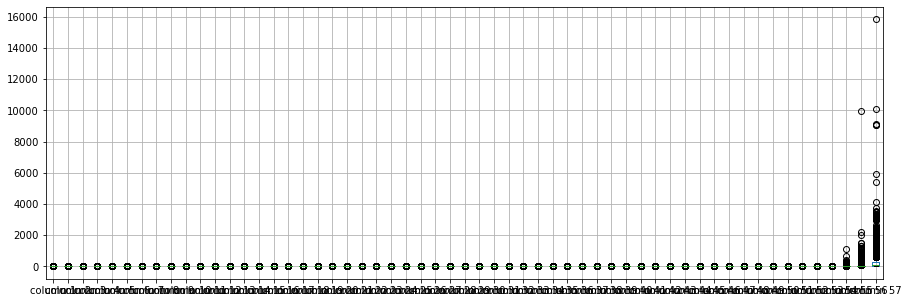

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.107389
column 2       0.214768
column 3       0.279149
column 4       0.067047
column 5       0.314705
column 6       0.097727
column 7       0.115291
column 8       0.103842
column 9       0.087222
column 10      0.236427
column 11      0.059864
column 12      0.545236
column 13      0.094481
column 14      0.059370
column 15      0.050298
column 16      0.252732
column 17      0.139306
column 18      0.185577
column 19      1.664375
column 20      0.085836
column 21      0.825783
column 22      0.118082
column 23      0.104577
column 24      0.095901
column 25      0.546764
column 26      0.269292
column 27      0.766865
column 28      0.131169
column 29      0.104377
column 30      0.108326
column 31      0.068167
column 32      0.050973
column 33      0.097603
column 34      0.052936
column 35      0.111340
column 36      0.097926
column 37      0.134773
column 38      0.011207
column 39      0.076752
column 40      0.069028
column 41      0.043026
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.015882,0.060259,-0.005179,0.017005,0.056603,0.009451,-0.009503,0.105690,0.030635,...,-0.018504,-0.029083,-0.017837,-0.031001,0.072985,0.121385,-0.007090,0.042961,0.053967,0.082434
column 2,-0.015882,1.000000,-0.034507,-0.007030,-0.025435,-0.024439,-0.000416,-0.017397,-0.008291,0.029552,...,-0.015512,-0.008338,-0.051289,-0.017889,-0.015781,-0.014837,0.002762,0.004524,0.001055,-0.025025
column 3,0.060259,-0.034507,1.000000,-0.020825,0.086011,0.086729,0.034295,0.006218,0.092907,0.024126,...,-0.025291,-0.030815,-0.022464,-0.029387,0.114124,0.089999,0.000859,0.080372,0.098713,0.064355
column 4,-0.005179,-0.007030,-0.020825,1.000000,-0.007523,-0.010266,0.020927,0.006284,0.002906,-0.002543,...,-0.002055,0.000192,-0.011186,-0.006005,-0.003618,0.008349,0.000942,0.009306,0.021198,0.021117
column 5,0.017005,-0.025435,0.086011,-0.007523,1.000000,0.052261,0.149517,0.026318,0.023812,0.030776,...,-0.032880,-0.032516,-0.044323,-0.022378,0.027543,0.043268,0.005759,0.041079,0.050131,-0.000528
column 6,0.056603,-0.024439,0.086729,-0.010266,0.052261,1.000000,0.058465,0.079759,0.118531,0.013065,...,-0.031675,-0.015359,-0.005959,-0.010203,0.060145,0.117899,0.035723,-0.007010,0.085956,0.080713
column 7,0.009451,-0.000416,0.034295,0.020927,0.149517,0.058465,1.000000,0.034037,0.057151,0.047002,...,-0.032001,-0.032142,-0.053854,-0.027156,0.061125,0.082545,0.052447,0.058945,0.054898,-0.006897
column 8,-0.009503,-0.017397,0.006218,0.006284,0.026318,0.079759,0.034037,1.000000,0.111010,0.072640,...,-0.020752,-0.027996,-0.032391,-0.017235,0.027618,0.056081,-0.006002,0.018844,0.033270,0.032520
column 9,0.105690,-0.008291,0.092907,0.002906,0.023812,0.118531,0.057151,0.111010,1.000000,0.132453,...,-0.025441,-0.014101,-0.031413,0.017262,0.061666,0.150286,0.005819,0.100669,0.161965,0.239731
column 10,0.030635,0.029552,0.024126,-0.002543,0.030776,0.013065,0.047002,0.072640,0.132453,1.000000,...,-0.014381,0.009322,0.004667,0.010907,0.030341,0.069957,0.037989,0.068789,0.084476,0.077854


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 549.7136868201067
Epoch: 1 , loss: 552.4882686229533
Epoch: 2 , loss: 549.6185282531101
Epoch: 3 , loss: 544.3235424719621
Epoch: 4 , loss: 543.3965730035762
Epoch: 5 , loss: 550.3540825926883
Epoch: 6 , loss: 547.7441019197789
Epoch: 7 , loss: 546.5701147737403
Epoch: 8 , loss: 546.0614328417629
Epoch: 9 , loss: 541.1181749616351
Epoch: 10 , loss: 517.9459181729094
Epoch: 11 , loss: 448.46541696475356
Epoch: 12 , loss: 435.66146995464686
Epoch: 13 , loss: 412.3936589736141
Epoch: 14 , loss: 392.8388939834223
Epoch: 15 , loss: 389.36276651841007
Epoch: 16 , loss: 376.05676102056736
Epoch: 17 , loss: 370.43129908332423
Epoch: 18 , loss: 360.6867934436333
Epoch: 19 , loss: 367.79440400658586
Epoch: 20 , loss: 378.06882365156963
Epoch: 21 , loss: 366.5347358225115
Epoch: 22 , loss: 375.6232072384931
Epoch: 23 , loss: 359.57759854519406
Epoch: 24 , loss: 367.4136328082467
Epoch: 25 , loss: 361.695182255336

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.517494,0.0,0.000000,0.0,...,0.000000,-0.123320,0.618424,-0.454663,0.000000,0.000000,0.0,0.000000,12.441055,0.000000
2,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.23277,0.000000,0.000000,0.0,0.075640,0.0,0.032748,0.0,...,0.000000,0.000000,0.103930,-0.018337,0.047630,0.024880,0.0,-0.078082,0.000000,-89.753050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.037440,0.0,0.000000,0.0,...,0.000000,-0.000737,-0.238886,0.008421,0.000000,0.000000,0.0,0.000000,-8.189593,0.000000
4593,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4594,0.0,0.0,0.00000,0.006663,0.275195,0.0,0.025653,0.0,-0.020183,0.0,...,0.040395,-0.105877,0.000000,0.016760,0.236414,0.008271,0.0,0.034907,0.000000,45.250443
4595,0.0,0.0,0.00000,-0.152797,-0.021997,0.0,0.196263,0.0,0.102528,0.0,...,0.122859,0.020383,0.000000,-0.170652,0.474482,0.258968,0.0,0.928522,0.000000,101.277390


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

17266.52412580378

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3638224598143365

In [19]:
new_df.iloc[66,:]

column 1       0.212111
column 2       0.440000
column 3       1.214623
column 4      -0.276831
column 5       0.440000
column 6       0.000000
column 7       0.323190
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14     -0.770116
column 15      0.000000
column 16     -0.083028
column 17      0.512311
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.069050
column 24      0.248831
column 25      0.000000
column 26      0.269924
column 27      0.000000
column 28     -0.825750
column 29      0.000000
column 30     -0.621347
column 31      0.000000
column 32      0.315419
column 33      0.000000
column 34     -0.130638
column 35      0.105910
column 36      0.013372
column 37      0.484920
column 38      0.000000
column 39      0.000000
column 40     -0.579574
column 41     -0.429120
column 42     -0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64000,0.000000,0.320000,0.00,0.000000,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.778000,0.000000,0.000,3.756000,61.000000,278.000000
1,0.21,0.28,0.50000,0.000000,0.140000,0.28,0.727494,0.07,0.000000,0.94,...,0.000000,-0.123320,0.750424,-0.454663,0.372000,0.180000,0.048,5.114000,113.441055,1028.000000
2,0.00,0.00,0.00000,0.000000,0.630000,0.00,0.310000,0.63,0.310000,0.63,...,0.000000,0.000000,0.135000,0.000000,0.135000,0.000000,0.000,3.537000,40.000000,191.000000
3,0.00,0.00,0.00000,0.000000,1.850000,0.00,0.000000,1.85,0.000000,0.00,...,0.000000,0.000000,0.223000,0.000000,0.000000,0.000000,0.000,3.000000,15.000000,54.000000
4,0.00,0.00,0.23277,0.000000,1.920000,0.00,0.075640,0.00,0.032748,0.64,...,0.000000,0.000000,0.157930,-0.018337,0.211630,0.078880,0.000,1.592918,4.000000,22.246950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64000,0.000000,0.000000,0.00,0.037440,0.00,0.000000,0.00,...,0.000000,-0.000737,0.109114,0.008421,1.160000,0.000000,0.000,3.121000,6.810407,103.000000
4593,0.00,0.00,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,3.043000,15.000000,70.000000
4594,0.00,0.00,0.00000,0.006663,0.275195,0.00,0.025653,0.00,-0.020183,0.00,...,0.040395,-0.105877,0.136000,0.016760,0.236414,0.008271,0.409,1.871907,12.000000,113.250443
4595,0.17,0.00,0.68000,-0.152797,0.318003,0.34,0.196263,0.00,0.102528,0.00,...,0.122859,0.020383,0.032000,-0.170652,0.539482,0.258968,0.000,2.117522,5.000000,170.277390


In [21]:
imputations[-1].to_excel("Spam_AN_10(imp).xlsx", index=False, header=False)